In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
class linearRegression:
  """
  A class for performing linear regression.
  Args:
    learning_rate: The learning rate to be used during training.
    n_iterations: The number of iterations to be performed during training.
  """
  def __init__(self, learning_rate=0.0001, n_iterations=100000):
    """
    Initializes the LinearRegression class.
    Args:
      learning_rate: The learning rate to be used during training.
      n_iterations: The number of iterations to be performed during training.
    """
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
    self.wights = None
    self.bias = None
  def fit_model(self, X, y):
    """
    Fits the linear regression model to the given data.
    Args:
      X: The training data.
      y: The target values.
    """
    n_samples, n_features = X.shape
    self.wights = np.zeros(n_features)
    self.bias = 0
    for _ in range(self.n_iterations):
      y_pred = np.dot(X, self.wights) + self.bias
      dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
      db = (1 / n_samples) * np.sum(y_pred - y)
      self.wights = self.wights - self.learning_rate * dw
      self.bias = self.bias - self.learning_rate * db
  def predict_model(self, X):
    """
    Predicts the target values for the given data.

    Args:
      X: The data to be used for prediction.

    Returns:
      The predicted target values.
    """
    y_pred = np.dot(X, self.wights) + self.bias
    return y_pred

  def mean_square_error(self, y_true, y_pred):
    """
    Calculates the mean squared error between the true and predicted values.
    Args:
      y_true: The true values.
      y_pred: The predicted values.

    Returns:
      The mean squared error.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

In [24]:
insurance_df = pd.read_csv('/content/insurance.csv')
insurance_df.head(20)

age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.71780
14   27    male  42.130         0    yes  southeast  39611.75770
15   19    male  24.600         1     no  southwest   1837.23700
16   52  female  30.780         1     no  northeast  10797.33620
17   23    male  23.845         0     no  northeast   2395.17155
18   56    male  40.300         0     no  southwest  10602.38500
19   30    male  35.300         0    yes  southwest  36837.46700

In [39]:
# Extract the feature columns (all columns except the target column)
feature_columns = insurance_df.drop('charges', axis=1)
# Extract the target column
target_column = insurance_df['charges']

In [26]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Explaratory Data Analysis

In [27]:
# Check for outliers
insurance_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [28]:
# Check for missing values
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
insurance_df.drop_duplicates()

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

In [30]:
#replace min outliars values(< value of 25%) with IQR
def replace_outliers(data, column_name):
    q1, q3 = np.percentile(data[column_name].astype(int), [25, 75])
    iqr = q3 - q1 # Calculating the interquartile range
    # Getting the lower and the upper thresholds/bounds
    lower_value = q1 - (1.5 * iqr)
    upper_value = q3 + (1.5 * iqr)
    # Replace out of range values
    data[column_name] = np.where(data[column_name]>upper_value,upper_value,np.where(data[column_name]<lower_value,lower_value,data[column_name]))
    return data

In [31]:
def normalize_data(data, data_feature):
      # Normalization (Min-Max scaling)
      mean = np.mean(data[data_feature])
      min_val = np.min(data[data_feature])
      max_val = np.max(data[data_feature])
      normalized_data = (data[data_feature] - mean) / (max_val - min_val)
      return normalized_data
def standarize_data(data, data_feature):
  # Standardization (Z-score normalization)
      mean = np.mean(data[data_feature])
      std = np.std(data[data_feature])
      standardized_data = (data[data_feature] - mean) / std
      return standardized_data

In [32]:
def label_encoding (df):
    # copy = df.copy() # Making copy of inputed dataframe
    columns = df.select_dtypes(exclude=["number"]) # Select non-numeric columns
    # Map the non-numeric columns to numbers
    for i in columns:
        df[i] = pd.factorize(df[i],sort=True)[0]
    return df

In [12]:
#apply preprocessing functions
# insurance_df['charges'] = normalize_data(insurance_df['charges'])
insurance_df['bmi'] = normalize_data(insurance_df, 'bmi')
# insurance_df['charges'] = standarize_data(insurance_df['charges'])
insurance_df['bmi'] = standarize_data(insurance_df, 'bmi')
insurance_df['charges'] = np.log(insurance_df['charges'])

In [33]:
insurance_df = label_encoding(insurance_df)

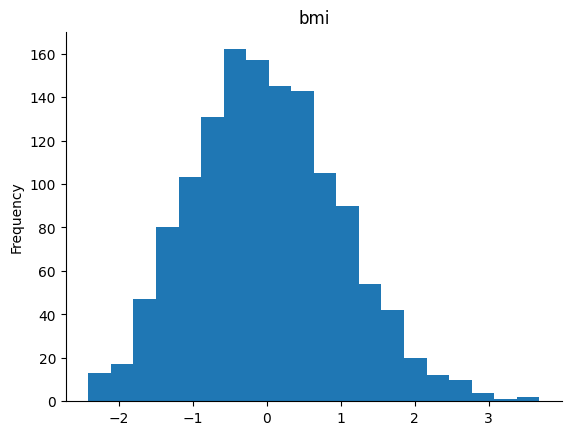

In [16]:
from matplotlib import pyplot as plt
insurance_df['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-17-cd094dfb68d2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['charges'],bins=50,color='r',ax=ax)
<ipython-input-17-cd094dfb68d2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(insurance_df['charges']),bins=40,color='b',ax=ax)


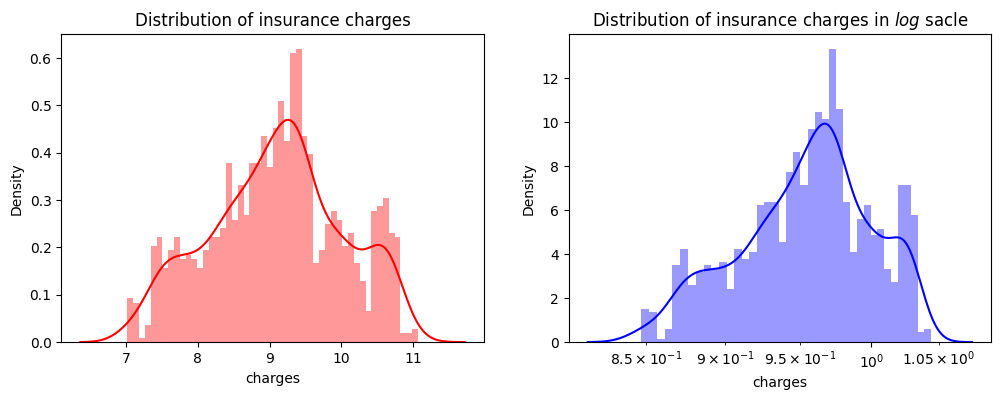

In [17]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(insurance_df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(insurance_df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

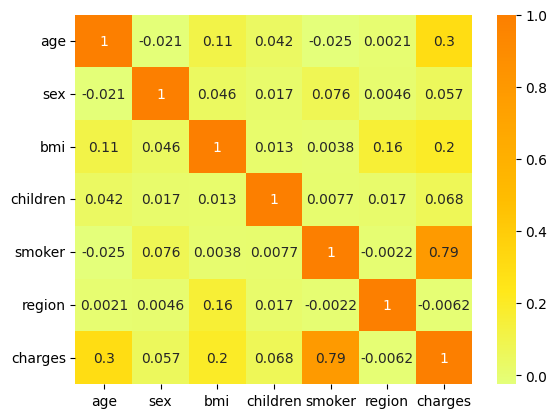

In [43]:
# Check for collinearity
corr = insurance_df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [44]:
charges_region_corr = insurance_df['charges'].corr(insurance_df['region'])
charges_region_corr

-0.006208234909444513

In [45]:
charges_sex_corr = insurance_df['charges'].corr(insurance_df['sex'])
charges_sex_corr

0.057292062202025484

In [46]:
charges_smoker_corr = insurance_df['charges'].corr(insurance_df['smoker'])
charges_smoker_corr

0.787251430498478

In [47]:
insurance_df

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]

In [40]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(feature_columns, target_column, test_size = 0.2, random_state=42)

In [35]:
X_train.shape

(1070, 6)

In [36]:
y_train.shape

(1070,)

In [37]:
X_test.shape

(268, 6)

In [41]:
implemented_model = linearRegression()
implemented_model.fit_model(X_train, y_train)
implemented_model_y_pred = implemented_model.predict_model(X_test)
implemented_model_accuracy = r2_score(y_test, implemented_model_y_pred)
implemented_model_accuracy

0.7343331620497746

In [42]:
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
sklearn_y_pred = sklearn_model.predict(X_test)
sklearn_accuracy = r2_score(y_test, sklearn_y_pred)
sklearn_accuracy

0.7833463107364539